### Imports

In [1]:
import pandas as pd
from numpy.linalg import eig
import matplotlib.pyplot as plt

### Load Iris dataset as pandas dataframe

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. Create a user-defined function to compute pairwise Pearson correlation coefficients. The function takes two variables as arguments and returns the correlation coefficient between them

In [4]:
# Method takes two perameters x and y of type pandas.core.series.Series
def pearson_correlation_coefficient(x, y):
    return x.corr(y, method="pearson")

In [5]:
pearson_correlation_coefficient(df["sepal_length"], df["sepal_width"])

-0.11756978413300208

In [6]:
pearson_correlation_coefficient(df["sepal_length"], df["petal_length"])

0.8717537758865831

### 2. plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix

Text(0.5, 1.0, 'Correlation between two variables')

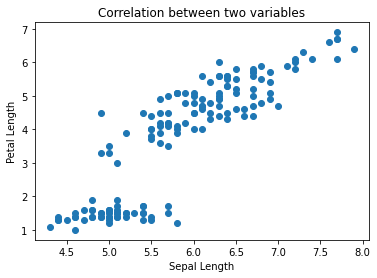

In [7]:
# Plot the graph to visualize the correlation between two variables.
x = df["sepal_length"]
y = df["petal_length"]

plt.scatter(x, y)

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Correlation between two variables")

In [8]:
# Visualize the correlation matrix
df.corr().style.background_gradient(cmap="GnBu")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 3. Perform z-score standardization on the data

In [9]:
df_zscore = (df.iloc[:,:4] - df.iloc[:,:4].mean()) / df.iloc[:,:4].std(ddof=0)

In [10]:
df_zscore

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### 4. Compute covariance matrix for the standardized data

In [11]:
df_covarience = df_zscore.cov()

In [12]:
df_covarience

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


### 5. Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending order

In [13]:
eigen_values, eigen_vectors = eig(df_covarience)

#### Results are already in decending order

In [14]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [15]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

#### But if we still want to make sure that the results are in decending order then the following code can achieve that

In [16]:
sorted_index = eigen_values.argsort()[::-1]

In [17]:
eigen_values[sorted_index]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
eigen_vectors[:, sorted_index]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

#### Following code is just to check whether the results are correct or not

In [19]:
# Lets check Ax = λx
# LHS
df_covarience.dot(eigen_vectors[:,0])

sepal_length    1.530936
sepal_width    -0.791366
petal_length    1.705303
petal_width     1.659597
dtype: float64

In [20]:
# RHS
eigen_values[0] * eigen_vectors[:,0]

array([ 1.53093597, -0.79136569,  1.70530304,  1.65959654])